# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
#Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# weather_api_key
output_data = "../output_data/cities.csv"
output_data

'../output_data/cities.csv'

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

base_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = base_url + city
print(city_url)

https://api.openweathermap.org/data/2.5/weather?appid=32b5efd1a7f096215f709f8b859c34bd&units=metric&q=waitangi


In [26]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [28]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     # Create endpoint URL with each city
#     city_url = base_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lng = city_weather["coord"]["lng"]
        city_lat = city_weather["coord"]["lat"]
        city_max_temp =city_weather["main"]["max_temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lng": city_lng,
                          "Lat": city_lat, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
City not found. Skipping...
Processing Record 2 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 3 of Set 1 | hawaiian paradise park
City not found. Skipping...
Processing Record 4 of Set 1 | walvis bay
City not found. Skipping...
Processing Record 5 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 6 of Set 1 | port douglas
City not found. Skipping...
Processing Record 7 of Set 1 | bethel
City not found. Skipping...
Processing Record 8 of Set 1 | santa ana
City not found. Skipping...
Processing Record 9 of Set 1 | udachny
City not found. Skipping...
Processing Record 10 of Set 1 | sinabang
City not found. Skipping...
Processing Record 11 of Set 1 | callao
City not found. Skipping...
Processing Record 12 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 13 of Set 1 | avarua
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 17 of Set 3 | diamantino
City not found. Skipping...
Processing Record 18 of Set 3 | coquimbo
City not found. Skipping...
Processing Record 19 of Set 3 | kayangel
City not found. Skipping...
Processing Record 20 of Set 3 | antsiranana
City not found. Skipping...
Processing Record 21 of Set 3 | mata-utu
City not found. Skipping...
Processing Record 22 of Set 3 | ulsteinvik
City not found. Skipping...
Processing Record 23 of Set 3 | yuzhno-kurilsk
City not found. Skipping...
Processing Record 24 of Set 3 | kedainiai
City not found. Skipping...
Processing Record 25 of Set 3 | carnarvon
City not found. Skipping...
Processing Record 26 of Set 3 | gisborne
City not found. Skipping...
Processing Record 27 of Set 3 | sinop
City not found. Skipping...
Processing Record 28 of Set 3 | moussoro
City not found. Skipping...
Processing Record 29 of Set 3 | basco
City not found. Skipping...
Processing Record 30 of Set 3 | rurrenabaque
City not found. Skipp

City not found. Skipping...
Processing Record 35 of Set 5 | biharamulo
City not found. Skipping...
Processing Record 36 of Set 5 | pacific grove
City not found. Skipping...
Processing Record 37 of Set 5 | taunggyi
City not found. Skipping...
Processing Record 38 of Set 5 | colonia
City not found. Skipping...
Processing Record 39 of Set 5 | tofol
City not found. Skipping...
Processing Record 40 of Set 5 | oltinko'l
City not found. Skipping...
Processing Record 41 of Set 5 | miass
City not found. Skipping...
Processing Record 42 of Set 5 | flying fish cove
City not found. Skipping...
Processing Record 43 of Set 5 | namibe
City not found. Skipping...
Processing Record 44 of Set 5 | enewetak
City not found. Skipping...
Processing Record 45 of Set 5 | myadzyel
City not found. Skipping...
Processing Record 46 of Set 5 | sisimiut
City not found. Skipping...
Processing Record 47 of Set 5 | natal
City not found. Skipping...
Processing Record 48 of Set 5 | kerikeri
City not found. Skipping...
Pr

City not found. Skipping...
Processing Record 2 of Set 8 | lensk
City not found. Skipping...
Processing Record 3 of Set 8 | mirnyy
City not found. Skipping...
Processing Record 4 of Set 8 | grand falls-windsor
City not found. Skipping...
Processing Record 5 of Set 8 | bonny
City not found. Skipping...
Processing Record 6 of Set 8 | ayaguz
City not found. Skipping...
Processing Record 7 of Set 8 | toga village
City not found. Skipping...
Processing Record 8 of Set 8 | conceicao da barra
City not found. Skipping...
Processing Record 9 of Set 8 | ust'-ordynskiy
City not found. Skipping...
Processing Record 10 of Set 8 | akjoujt
City not found. Skipping...
Processing Record 11 of Set 8 | new norfolk
City not found. Skipping...
Processing Record 12 of Set 8 | al qubbah
City not found. Skipping...
Processing Record 13 of Set 8 | cill airne
City not found. Skipping...
Processing Record 14 of Set 8 | muroto-misakicho
City not found. Skipping...
Processing Record 15 of Set 8 | gamba
City not fo

City not found. Skipping...
Processing Record 19 of Set 10 | vadso
City not found. Skipping...
Processing Record 20 of Set 10 | samus'
City not found. Skipping...
Processing Record 21 of Set 10 | vilyuchinsk
City not found. Skipping...
Processing Record 22 of Set 10 | axim
City not found. Skipping...
Processing Record 23 of Set 10 | hun
City not found. Skipping...
Processing Record 24 of Set 10 | port augusta
City not found. Skipping...
Processing Record 25 of Set 10 | sarupathar
City not found. Skipping...
Processing Record 26 of Set 10 | st. john's
City not found. Skipping...
Processing Record 27 of Set 10 | iwanai
City not found. Skipping...
Processing Record 28 of Set 10 | hobyo
City not found. Skipping...
Processing Record 29 of Set 10 | baker city
City not found. Skipping...
Processing Record 30 of Set 10 | pangai
City not found. Skipping...
Processing Record 31 of Set 10 | north platte
City not found. Skipping...
Processing Record 32 of Set 10 | nouadhibou
City not found. Skippi

City not found. Skipping...
Processing Record 36 of Set 12 | tsiombe
City not found. Skipping...
Processing Record 37 of Set 12 | zhirnovsk
City not found. Skipping...
Processing Record 38 of Set 12 | nabagram
City not found. Skipping...
Processing Record 39 of Set 12 | rumoi
City not found. Skipping...
Processing Record 40 of Set 12 | ta`u
City not found. Skipping...
Processing Record 41 of Set 12 | linqu
City not found. Skipping...
Processing Record 42 of Set 12 | mandsaur
City not found. Skipping...
Processing Record 43 of Set 12 | chestertown
City not found. Skipping...
Processing Record 44 of Set 12 | okene
City not found. Skipping...
Processing Record 45 of Set 12 | waingapu
City not found. Skipping...
Processing Record 46 of Set 12 | mariana
City not found. Skipping...
Processing Record 47 of Set 12 | topolobampo
City not found. Skipping...
Processing Record 48 of Set 12 | meulaboh
City not found. Skipping...
Processing Record 49 of Set 12 | brumadinho
City not found. Skipping..

In [43]:
city_dict = {
    'City': name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': maxtemp,
    'Humidity': humi,
    'Cloudiness': cloud,
    'Wind Speed': wind,
    'Country': ctry,
    'Date': date}

city_data_df=pd.DataFrame(city_dict)


city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adamstown,-25.0660,-130.1015,24.32,76,100,2.78,PN,1682029779
1,Edinburgh of the Seven Seas,-37.0676,-12.3116,20.00,95,100,12.46,SH,1682029779
2,Hawaiian Paradise Park,19.5933,-154.9731,28.35,78,0,3.60,US,1682029179
3,Walvis Bay,-22.9575,14.5053,15.61,87,0,5.86,NA,1682029780
4,Blackmans Bay,-43.0167,147.3167,16.07,77,100,3.04,AU,1682029780


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv(("../output_data/cities.csv"), index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv(("../output_data/cities.csv"), index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,24.32,76,100,2.78,PN,1682029779
1,Edinburgh of the Seven Seas,-37.0676,-12.3116,20.00,95,100,12.46,SH,1682029779
2,Hawaiian Paradise Park,19.5933,-154.9731,28.35,78,0,3.60,US,1682029179
3,Walvis Bay,-22.9575,14.5053,15.61,87,0,5.86,NaN,1682029780
4,Blackmans Bay,-43.0167,147.3167,16.07,77,100,3.04,AU,1682029780


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

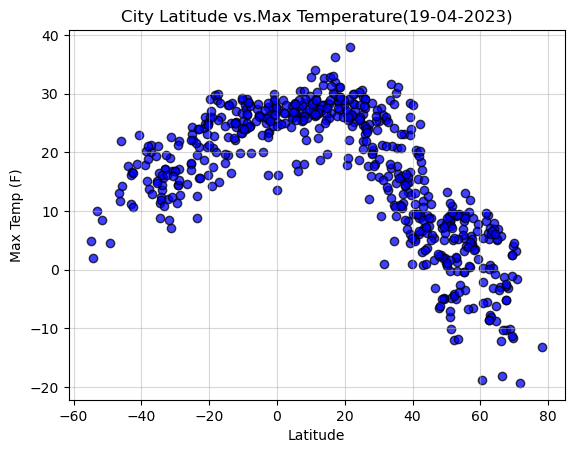

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], facecolor='blue', 
            edgecolors='black', marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs.Max Temperature(19-04-2023)')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(linestyle="-", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE